### Python code to analyze `Sentinel-5P TROPOMI aerosol index from 388 and 354 nm` for a case of dust at `Sal Island, Cape Verde`.

In [1]:
%matplotlib inline
import os
import xarray as xr
import numpy as np
import netCDF4 as nc
import pandas as pd

from IPython.display import HTML

import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib.cm import get_cmap
from matplotlib import animation
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature

from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

import warnings
warnings.simplefilter(action = "ignore", category = RuntimeWarning)
warnings.simplefilter(action = "ignore", category = UserWarning)

In [2]:
%run ../functions.ipynb

In [3]:
s5p = xr.open_dataset('C:/Users/dayo/Desktop/data_jupyter/S5P_OFFL_L2__AER_AI_20210216T140223_20210216T154353_17340_01_010400_20210218T034605.nc', group='PRODUCT')

In [4]:
ai = s5p.aerosol_index_354_388

ai_0602 = ai[0,:,:]

longname = ai_0602.long_name
units = ai_0602.units

(<Figure size 1440x720 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'Aerosol index from 388 and 354 nm 2021-02-16T00:00:00.000000000'}>)

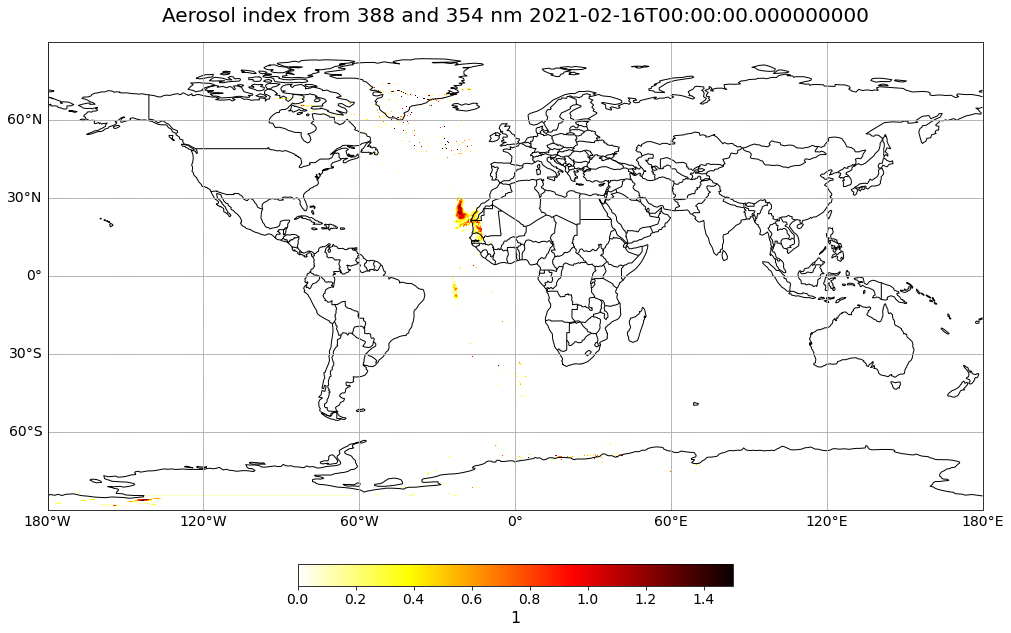

In [5]:
visualize_pcolormesh(data_array=ai_0602,
                     longitude=ai_0602.longitude,
                     latitude=ai_0602.latitude,
                     projection=ccrs.PlateCarree(),
                     color_scale='hot_r',
                     unit=units,
                     long_name=longname + ' ' + str(ai_0602.time.data),
                     vmin=0, 
                     vmax=1.5,
                     lonmin=-180,
                     lonmax=180,
                     latmin=-90,
                     latmax=90,
                     set_global=True)

### Creating a subset for `Sal Island`

In [6]:
latmin = 10.
latmax = 33.
lonmin = -25.
lonmax = -10

ai_0602_subset = generate_geographical_subset(xarray=ai_0602, 
                                             latmin=latmin, 
                                             latmax=latmax, 
                                             lonmin=lonmin, 
                                             lonmax=lonmax)

(<Figure size 1440x720 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'Aerosol index from 388 and 354 nm 2021-02-16T00:00:00.000000000'}>)

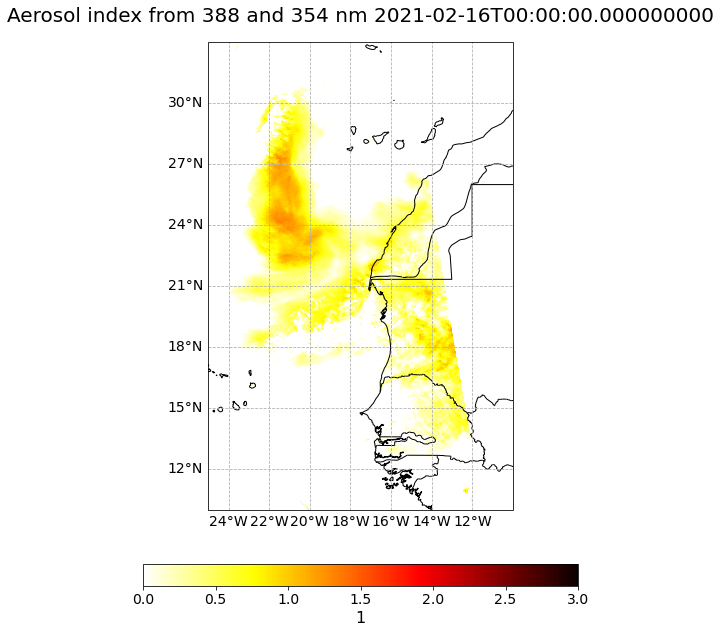

In [7]:
visualize_pcolormesh(data_array=ai_0602_subset,
                     longitude=ai_0602_subset.longitude,
                     latitude=ai_0602_subset.latitude,
                     projection=ccrs.PlateCarree(),
                     color_scale='hot_r',
                     unit=units,
                     long_name=longname + ' ' + str(ai_0602_subset.time.data),
                     vmin=0, 
                     vmax=3,
                     lonmin=lonmin,
                     lonmax=lonmax,
                     latmin=latmin,
                     latmax=latmax,
                     set_global=False)
